In [1]:
import torch

In [5]:
import pandas
import os

In [3]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 76.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 35.0 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [8]:
os.listdir('./data')

['customers.csv',
 '.DS_Store',
 'images',
 'articles.csv',
 'transactions_train.csv',
 'sample_submission.csv']

In [62]:
customers = pandas.read_csv("./data/customers.csv")

In [11]:
articles = pandas.read_csv("./data/articles.csv")

In [20]:
transactions = pandas.read_csv("./data/transactions_train.csv")

In [21]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [15]:
submission = pandas.read_csv("./data/sample_submission.csv")

In [30]:
submission

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...
...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0706016001 0706016002 0372860001 0610776002 07...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0706016001 0706016002 0372860001 0610776002 07...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,0706016001 0706016002 0372860001 0610776002 07...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,0706016001 0706016002 0372860001 0610776002 07...


In [19]:
submission_users = set(list(submission['customer_id']))

In [22]:
transaction_users = set(list(transactions['customer_id']))

In [28]:
intersect_user = set()
for u in submission_users:
    if u in transaction_users:
        intersect_user.add(u)
    

In [29]:
len(intersect_user), len(submission_users), len(transaction_users)

(1362281, 1371980, 1362281)

In [34]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [35]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

# Articles Categorical

In [38]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [37]:
import pandas as pd

cols_to_encode = [col for col in articles.columns if col.endswith('_no')]

# Use pd.get_dummies to one-hot encode these columns
articles_encoded = pd.get_dummies(articles, columns=cols_to_encode, prefix=cols_to_encode)

print(articles_encoded.head())

   article_id  product_code          prod_name product_type_name  \
0   108775015        108775          Strap top          Vest top   
1   108775044        108775          Strap top          Vest top   
2   108775051        108775      Strap top (1)          Vest top   
3   110065001        110065  OP T-shirt (Idro)               Bra   
4   110065002        110065  OP T-shirt (Idro)               Bra   

   product_group_name graphical_appearance_name  colour_group_code  \
0  Garment Upper body                     Solid                  9   
1  Garment Upper body                     Solid                 10   
2  Garment Upper body                    Stripe                 11   
3           Underwear                     Solid                  9   
4           Underwear                     Solid                 10   

  colour_group_name  perceived_colour_value_id perceived_colour_value_name  \
0             Black                          4                        Dark   
1             

In [42]:
# Select columns that contain '_no' in their names
columns_with_no = [col for col in articles_encoded.columns if '_no' in col]

# Create a new DataFrame with only those columns
articles_categorical = articles_encoded[columns_with_no]

In [44]:
articles_categorical.index = articles_encoded['article_id']

product_type_no_49
False    105494
True         48
Name: count, dtype: int64

# Users Categorical

In [57]:
cols_to_encode = ['Active', 'FN', 'club_member_status', 'fashion_news_frequency']

In [60]:
customers_encoded = pd.DataFrame()
mapping_dict = {}
for col in cols_to_encode:
    # 1. Find unique values
    unique_vals = customers[col].unique()
    
    # 2. Create a mapping dictionary (value -> integer code)
    mapping = {val: idx for idx, val in enumerate(unique_vals)}
    mapping_dict[col] = mapping
    print(f"Mapping for '{col}': {mapping}")
    
    # 3. Map the original column to integer codes
    code_col = col + '_code'
    customers[code_col] = customers[col].map(mapping)
    
    # 4. One-hot encode the integer codes
    dummies = pd.get_dummies(customers[code_col], prefix=col)
    
    # Concatenate the dummy variables back into the DataFrame
    customers_encoded = pd.concat([customers_encoded, dummies], axis=1)

print("\nDataFrame after one-hot encoding:")
print(customers_encoded)

Mapping for 'Active': {np.float64(nan): 0, np.float64(1.0): 1}
Mapping for 'FN': {np.float64(nan): 0, np.float64(1.0): 1}
Mapping for 'club_member_status': {'ACTIVE': 0, nan: 1, 'PRE-CREATE': 2, 'LEFT CLUB': 3}
Mapping for 'fashion_news_frequency': {'NONE': 0, 'Regularly': 1, nan: 2, 'Monthly': 3}

DataFrame after one-hot encoding:
         Active_0  Active_1   FN_0   FN_1  club_member_status_0  \
0            True     False   True  False                  True   
1            True     False   True  False                  True   
2            True     False   True  False                  True   
3            True     False   True  False                  True   
4           False      True  False   True                  True   
...           ...       ...    ...    ...                   ...   
1371975      True     False   True  False                  True   
1371976      True     False   True  False                  True   
1371977     False      True  False   True                  True

In [61]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3
0,True,False,True,False,True,False,False,False,True,False,False,False
1,True,False,True,False,True,False,False,False,True,False,False,False
2,True,False,True,False,True,False,False,False,True,False,False,False
3,True,False,True,False,True,False,False,False,True,False,False,False
4,False,True,False,True,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1371975,True,False,True,False,True,False,False,False,True,False,False,False
1371976,True,False,True,False,True,False,False,False,True,False,False,False
1371977,False,True,False,True,True,False,False,False,False,True,False,False
1371978,False,True,False,True,True,False,False,False,False,True,False,False


In [68]:
customers.age /= 100

In [73]:
customers_encoded = pd.concat([customers_encoded, customers[['age']]], axis=1)

In [75]:
customers_encoded.index = customers['customer_id']

In [76]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3,age
customer_id,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,True,False,True,False,True,False,False,False,True,False,False,False,0.49
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,True,False,True,False,True,False,False,False,True,False,False,False,0.25
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,True,False,True,False,True,False,False,False,True,False,False,False,0.24
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,True,False,True,False,True,False,False,False,True,False,False,False,0.54
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,False,True,False,True,True,False,False,False,False,True,False,False,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,True,False,True,False,True,False,False,False,True,False,False,False,0.24
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,True,False,True,False,True,False,False,False,True,False,False,False,0.21
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,False,True,False,True,True,False,False,False,False,True,False,False,0.21


# Training Data

In [83]:

# Convert all boolean columns to floats in both DataFrames
for df in [customers_encoded, articles_categorical]:
    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(float)

/var/folders/pv/1ypdzppd02x4038ctfz2fnkr0000gn/T/ipykernel_86458/1207431484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bool_cols] = df[bool_cols].astype(float)


In [84]:
customers_encoded

,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,club_member_status_3,fashion_news_frequency_0,fashion_news_frequency_1,fashion_news_frequency_2,fashion_news_frequency_3,age
customer_id,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.49
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.25
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.24
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.54
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.24
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.21
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.21


In [85]:
articles_categorical

,product_type_no_-1,product_type_no_49,product_type_no_57,product_type_no_59,product_type_no_60,product_type_no_66,product_type_no_67,product_type_no_68,product_type_no_69,product_type_no_70,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108775044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108775051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110065001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
110065002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953450001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
953763001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956217002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [93]:
positive_labels = transactions[['customer_id', 'article_id']]
positive_labels['label'] = 1.0

/var/folders/pv/1ypdzppd02x4038ctfz2fnkr0000gn/T/ipykernel_86458/2595892956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_labels['label'] = 1.0


In [104]:
positive_labels

,customer_id,article_id,label
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,1.0
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,1.0
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,1.0
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,1.0
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,1.0
...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,1.0
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,1.0
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,1.0
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,1.0


In [106]:
customer_positive = positive_labels.groupby('customer_id')['article_id'].apply(set)

In [110]:
# Define the helper function that will sample a negative article for a row.
def sample_negative_for_row(row):
    customer = row['customer_id']
    pos_set = customer_positive.get(customer, set())
    
    # Start by sampling a candidate from the entire articles list.
    candidate = np.random.choice(articles['article_id'])
    
    # Iterate until the candidate is not in the customer's positive set.
    while candidate in pos_set:
        candidate = np.random.choice(articles['article_id'])
    
    # Increment our counter and print progress every 1,000 rows.
    sample_negative_for_row.counter += 1
    if sample_negative_for_row.counter % 1000 == 0:
        print(f"Processed {sample_negative_for_row.counter} rows")
    
    return candidate

# Initialize a counter attribute on the function.
sample_negative_for_row.counter = 0

print("\nStep 2: Generating negative samples for each positive interaction using .apply...")
# For each row in positive_labels, sample a negative article that is not in the customer's positive set.
positive_labels['negative_article'] = positive_labels.apply(sample_negative_for_row, axis=1)



Step 2: Generating negative samples for each positive interaction using .apply...
Processed 1000 rows
Processed 2000 rows
Processed 3000 rows
Processed 4000 rows
Processed 5000 rows
Processed 6000 rows
Processed 7000 rows
Processed 8000 rows
Processed 9000 rows
Processed 10000 rows
Processed 11000 rows
Processed 12000 rows
Processed 13000 rows
Processed 14000 rows
Processed 15000 rows
Processed 16000 rows
Processed 17000 rows
Processed 18000 rows
Processed 19000 rows
Processed 20000 rows
Processed 21000 rows
Processed 22000 rows
Processed 23000 rows
Processed 24000 rows
Processed 25000 rows
Processed 26000 rows
Processed 27000 rows
Processed 28000 rows
Processed 29000 rows
Processed 30000 rows
Processed 31000 rows
Processed 32000 rows
Processed 33000 rows
Processed 34000 rows
Processed 35000 rows
Processed 36000 rows
Processed 37000 rows
Processed 38000 rows
Processed 39000 rows
Processed 40000 rows
Processed 41000 rows
Processed 42000 rows
Processed 43000 rows
Processed 44000 rows
Pr

/var/folders/pv/1ypdzppd02x4038ctfz2fnkr0000gn/T/ipykernel_86458/345722147.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_labels['negative_article'] = positive_labels.apply(sample_negative_for_row, axis=1)


In [113]:
positive_labels.to_csv("./data/negative_labels_temp.csv")

In [116]:
# Step 1: Create a new DataFrame for negative samples
negative_labels = positive_labels[['customer_id', 'negative_article']].copy()
negative_labels.rename(columns={'negative_article': 'article_id'}, inplace=True)
negative_labels['label'] = 0.0

# Step 2: Concatenate positive and negative labels into one DataFrame
full_labels = pd.concat([positive_labels[['customer_id', 'article_id', 'label']], negative_labels], ignore_index=True)


In [118]:
full_labels.to_csv("./data/full_training_labels.csv")

In [119]:
training_data = full_labels.sample(frac=1, random_state=42).reset_index(drop=True)


In [133]:
full_training_data = training_data

In [122]:
training_data_small = training_data.sample(frac=0.001, random_state=42).reset_index(drop=True)

In [123]:
training_data_medium = training_data.sample(frac=0.01, random_state=42).reset_index(drop=True)

In [124]:
training_data_large = training_data.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [125]:
len(training_data_small), len(training_data_medium), len(training_data_large)

(63577, 635766, 6357665)

In [134]:
# Perform a left join
training_data = training_data_small.merge(customers_encoded, on="customer_id", how="left")


In [136]:
training_data = training_data.merge(articles_categorical, on="article_id", how="left")

In [140]:
training_data[['label']]

,label
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
...,...
63572,0.0
63573,0.0
63574,1.0
63575,1.0


# TTSN model

In [144]:
customers_encoded.columns, len(customers_encoded.columns)

(Index(['Active_0', 'Active_1', 'FN_0', 'FN_1', 'club_member_status_0',
        'club_member_status_1', 'club_member_status_2', 'club_member_status_3',
        'fashion_news_frequency_0', 'fashion_news_frequency_1',
        'fashion_news_frequency_2', 'fashion_news_frequency_3', 'age'],
       dtype='object'),
 13)

In [145]:
articles_categorical.columns, len(articles_categorical.columns)

(Index(['product_type_no_-1', 'product_type_no_49', 'product_type_no_57',
        'product_type_no_59', 'product_type_no_60', 'product_type_no_66',
        'product_type_no_67', 'product_type_no_68', 'product_type_no_69',
        'product_type_no_70',
        ...
        'garment_group_no_1013', 'garment_group_no_1014',
        'garment_group_no_1016', 'garment_group_no_1017',
        'garment_group_no_1018', 'garment_group_no_1019',
        'garment_group_no_1020', 'garment_group_no_1021',
        'garment_group_no_1023', 'garment_group_no_1025'],
       dtype='object', length=544),
 544)

In [155]:
training_data

,customer_id,article_id,label,Active_0,Active_1,FN_0,FN_1,club_member_status_0,club_member_status_1,club_member_status_2,...,garment_group_no_1013,garment_group_no_1014,garment_group_no_1016,garment_group_no_1017,garment_group_no_1018,garment_group_no_1019,garment_group_no_1020,garment_group_no_1021,garment_group_no_1023,garment_group_no_1025
0,557716a29afd925a80a972134bf6f63fb24943ed1cd33e...,786743001,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a0593e4164603ee9830dc1ed4a7a3cfd5abecaf4424ddc...,615141002,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b303d0055cc805086fa0022a6c61cb0e61a24376c14a6c...,666735001,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,f1f74b264240aa024a924a0edffd61908df2825b84f3c1...,911301001,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5d187c87e7dc44bc4c4e701da03147773a937c6db7eaa5...,685811005,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63572,34a06771f1dce07e64e1f060ae2da8c8e8c1195e92f302...,784205017,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63573,8152391b87fb0ab57067313fa8f8caf93209fd4b1c58b9...,766785003,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63574,207968eccc78b3baf8fe11908919ae4ff33085758d4c6c...,745232001,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63575,3fa0c831468d26d0f479fb0d5dc7540877713d80c97293...,399136061,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
import torch
from torch.utils.data import Dataset, DataLoader

class RecommendationDataset(Dataset):
    def __init__(self, customer_features, article_features, labels):
        """
        Args:
            customer_features (Tensor): shape [num_samples, 13]
            article_features (Tensor): shape [num_samples, 500]
            labels (Tensor): shape [num_samples] (e.g., implicit or explicit feedback)
        """
        self.customer_features = customer_features
        self.article_features = article_features
        self.labels = labels

    def __len__(self):
        return len(self.customer_features)

    def __getitem__(self, idx):
        return (self.customer_features.iloc[idx].values,
                self.article_features.iloc[idx].values,
                self.labels.iloc[idx].values)


# Create the dataset and then a DataLoader
dataset = RecommendationDataset(
    training_data[customers_encoded.columns].reset_index(drop=True).astype('float32').fillna(0.0), 
    training_data[articles_categorical.columns].reset_index(drop=True).astype('float32').fillna(0.0), 
    training_data[['label']].reset_index(drop=True).astype('float32').fillna(0.0))
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [212]:
import torch
import torch.nn as nn
import torch.optim as optim

class TwoTowerRecommender(nn.Module):
    def __init__(self, customer_input_dim=13, article_input_dim=500, embedding_dim=32):
        super(TwoTowerRecommender, self).__init__()
        # Customer tower: small MLP for 13 features.
        self.customer_tower = nn.Sequential(
            nn.Linear(customer_input_dim, 254),
            nn.ReLU(),
            nn.Linear(254, 254),
            nn.ReLU(),
            nn.Linear(254, embedding_dim)
        )
        
        # Article tower: deeper MLP for 500 features.
        self.article_tower = nn.Sequential(
            nn.Linear(article_input_dim, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, embedding_dim)
        )
    
    def forward(self, customer_features, article_features):
        customer_emb = self.customer_tower(customer_features)   # [batch, embedding_dim]
        article_emb = self.article_tower(article_features)        # [batch, embedding_dim]
        
        # Compute similarity, e.g., dot product.
        logits = (customer_emb * article_emb).sum(dim=1)
        probabilities = torch.sigmoid(logits)
        return probabilities 

model = TwoTowerRecommender(customer_input_dim=13, article_input_dim=544, embedding_dim=32)
criterion = nn.BCELoss()  # Binary cross-entropy loss for probability inputs
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [207]:
batch_idx, (customer_features, article_features, labels) = next(enumerate(data_loader))

In [208]:
customer_features, article_features, labels

(tensor([[1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.4600],
         [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          1.0000, 0.0000, 0.0000, 0.2500],
         [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          1.0000, 0.0000, 0.0000, 0.3600],
         [1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.3000],
         [1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.1700],
         [1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.5400],
         [0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          1.0000, 0.0000, 0.0000, 0.5200],
         [1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
          0.0000, 0.0000, 0.0000, 0.5000],


In [209]:
outputs = model(customer_features, article_features)

In [210]:
outputs

tensor([0.5000, 0.5005, 0.5004, 0.4995, 0.5002, 0.4998, 0.4997, 0.4998, 0.5001,
        0.5002, 0.5005, 0.4998, 0.4994, 0.5002, 0.5001, 0.4997, 0.5006, 0.5003,
        0.5003, 0.5001, 0.5002, 0.4998, 0.4991, 0.5005, 0.5002, 0.5005, 0.5000,
        0.5002, 0.5003, 0.5007, 0.5003, 0.5002], grad_fn=<SigmoidBackward0>)

In [213]:
training_loss = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for batch_idx, (customer_features, article_features, labels) in enumerate(data_loader):
        # Move data to GPU if available
        if torch.cuda.is_available():
            customer_features = customer_features.cuda()
            article_features = article_features.cuda()
            labels = labels.cuda()
            model = model.cuda()

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(customer_features, article_features)

        # Compute the loss
        loss = criterion(outputs, labels.float().view(-1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track the loss
        running_loss += loss.item()

        # Print progress every 100 batches
        if batch_idx % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(data_loader)}], Loss: {loss.item():.4f}")
            training_loss.append(loss.item())

    # Print epoch loss
    print(f"Epoch [{epoch+1}/{num_epochs}] - Average Loss: {running_loss / len(data_loader):.4f}")

Epoch [1/20], Step [0/1987], Loss: 0.6928
Epoch [1/20], Step [100/1987], Loss: 0.6910
Epoch [1/20], Step [200/1987], Loss: 0.6821
Epoch [1/20], Step [300/1987], Loss: 0.6006
Epoch [1/20], Step [400/1987], Loss: 0.6926
Epoch [1/20], Step [500/1987], Loss: 0.6021
Epoch [1/20], Step [600/1987], Loss: 0.6100
Epoch [1/20], Step [700/1987], Loss: 0.6214
Epoch [1/20], Step [800/1987], Loss: 0.4945
Epoch [1/20], Step [900/1987], Loss: 0.5450
Epoch [1/20], Step [1000/1987], Loss: 0.6382
Epoch [1/20], Step [1100/1987], Loss: 0.6036
Epoch [1/20], Step [1200/1987], Loss: 0.6710
Epoch [1/20], Step [1300/1987], Loss: 0.4382
Epoch [1/20], Step [1400/1987], Loss: 0.4735
Epoch [1/20], Step [1500/1987], Loss: 0.6460
Epoch [1/20], Step [1600/1987], Loss: 0.5585
Epoch [1/20], Step [1700/1987], Loss: 0.3643
Epoch [1/20], Step [1800/1987], Loss: 0.5937
Epoch [1/20], Step [1900/1987], Loss: 0.5401
Epoch [1/20] - Average Loss: 0.5748
Epoch [2/20], Step [0/1987], Loss: 0.5512
Epoch [2/20], Step [100/1987], Los

In [187]:
from matplotlib import pyplot as plt

In [218]:
def moving_average(data, window_size=3):
    return [sum(data[i:i+window_size]) / window_size for i in range(len(data) - window_size + 1)]

# Smooth the losses
smoothed_train_losses = moving_average(training_loss, window_size=100)
#smoothed_test_losses = moving_average(test_losses, window_size=4)

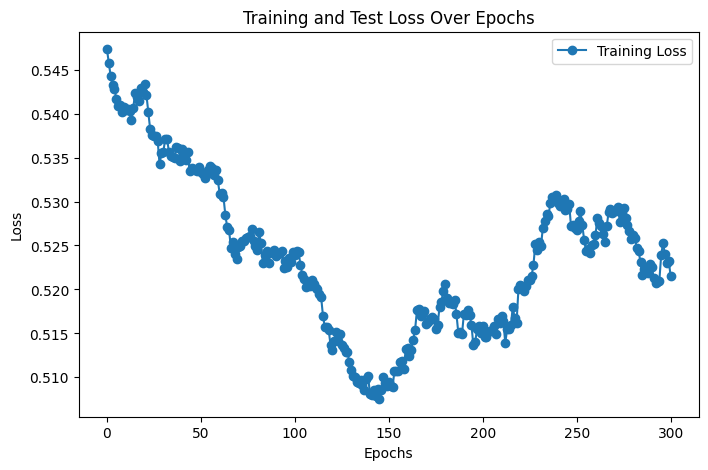

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(smoothed_train_losses, label="Training Loss", marker='o')
#plt.plot(smoothed_test_losses, label="Training Loss", marker='o')
#plt.plot(train_losses, label="Training Loss", marker='o')
#plt.plot(test_losses, label="Test Loss", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss Over Epochs")
plt.legend()
plt.show()

In [220]:
import torch

# Path to save the checkpoint
checkpoint_path = "./data/two_tower_checkpoint_1_Feb_A.pth"

# Save function
def save_checkpoint(model, optimizer, epoch, loss):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"Checkpoint saved at epoch {epoch} with loss {loss:.4f}")

# Example usage (assuming you’re at epoch 5 with some loss value)
save_checkpoint(model, optimizer, epoch=20, loss=0.5192)


Checkpoint saved at epoch 20 with loss 0.5192
